rev_Mean       float64
mou_Mean       float64
totmrc_Mean    float64
da_Mean        float64
ovrmou_Mean    float64
                ...   
kid11_15        object
kid16_17        object
creditcd        object
eqpdays        float64
Customer_ID      int64
Length: 100, dtype: object
rev_Mean        357
mou_Mean        357
totmrc_Mean     357
da_Mean         357
ovrmou_Mean     357
               ... 
kid11_15       1732
kid16_17       1732
creditcd       1732
eqpdays           1
Customer_ID       0
Length: 100, dtype: int64


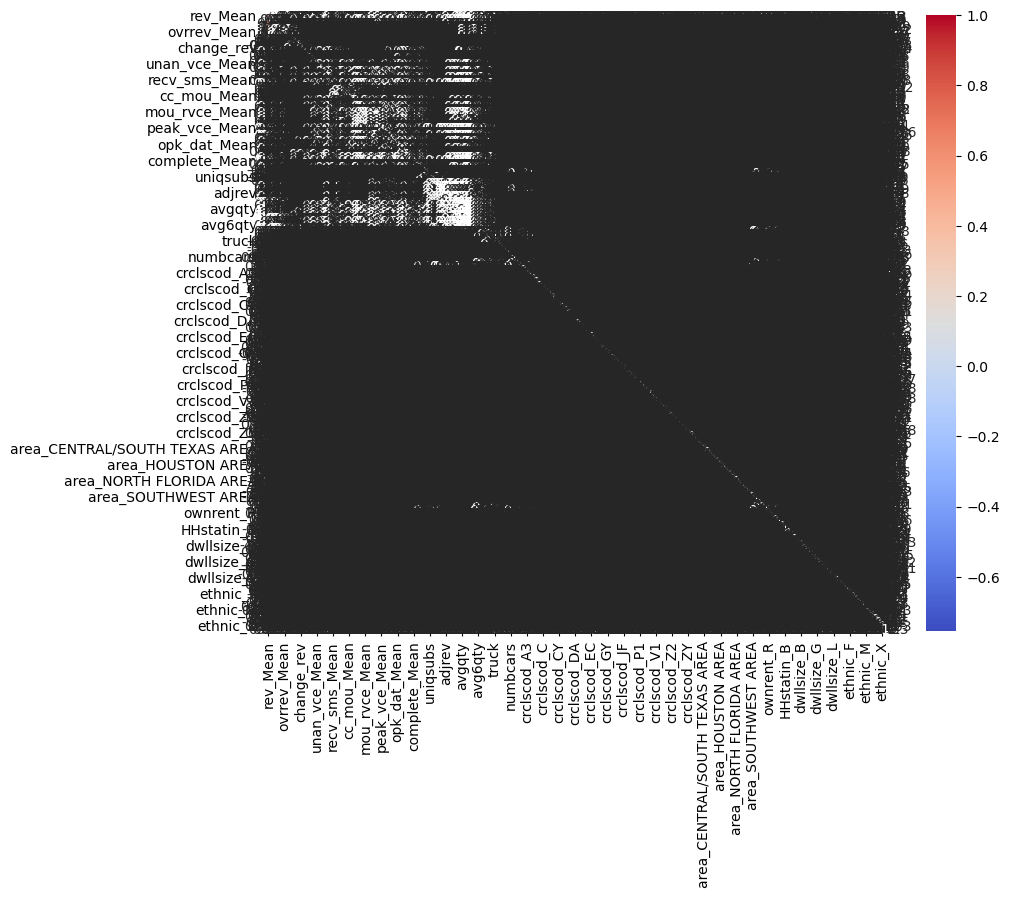

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("Telecom_customer churn.csv")
print(data.dtypes)
print(data.isnull().sum())
data.replace(['N', 'U'], np.nan, inplace=True)
data.fillna(data.select_dtypes(include='number').mean(), inplace=True)
data = pd.get_dummies(data, drop_first=True)
X = data.drop('churn', axis=1)
y = data['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')0
plt.show()

In [39]:
missing_values = data.isnull().sum()
print(missing_values)

rev_Mean       0
mou_Mean       0
totmrc_Mean    0
da_Mean        0
ovrmou_Mean    0
              ..
ethnic_P       0
ethnic_R       0
ethnic_S       0
ethnic_X       0
ethnic_Z       0
Length: 192, dtype: int64


In [41]:
data = data.dropna()

In [42]:
numeric_cols = data.select_dtypes(include=['number']).columns
print("Numeric columns:", numeric_cols)

Numeric columns: Index(['rev_Mean', 'mou_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean',
       'ovrrev_Mean', 'vceovr_Mean', 'datovr_Mean', 'roam_Mean', 'change_mou',
       'change_rev', 'drop_vce_Mean', 'drop_dat_Mean', 'blck_vce_Mean',
       'blck_dat_Mean', 'unan_vce_Mean', 'unan_dat_Mean', 'plcd_vce_Mean',
       'plcd_dat_Mean', 'recv_vce_Mean', 'recv_sms_Mean', 'comp_vce_Mean',
       'comp_dat_Mean', 'custcare_Mean', 'ccrndmou_Mean', 'cc_mou_Mean',
       'inonemin_Mean', 'threeway_Mean', 'mou_cvce_Mean', 'mou_cdat_Mean',
       'mou_rvce_Mean', 'owylis_vce_Mean', 'mouowylisv_Mean',
       'iwylis_vce_Mean', 'mouiwylisv_Mean', 'peak_vce_Mean', 'peak_dat_Mean',
       'mou_peav_Mean', 'mou_pead_Mean', 'opk_vce_Mean', 'opk_dat_Mean',
       'mou_opkv_Mean', 'mou_opkd_Mean', 'drop_blk_Mean', 'attempt_Mean',
       'complete_Mean', 'callfwdv_Mean', 'callwait_Mean', 'churn', 'months',
       'uniqsubs', 'actvsubs', 'totcalls', 'totmou', 'totrev', 'adjrev',
       'adjmou', 'adjqty

In [44]:
outlier_dict = {}
for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    if not outliers.empty:
        outlier_dict[col] = outliers
for col, outliers in outlier_dict.items():
    print(f"Outliers in column '{col}':")
    print(outliers)

Outliers in column 'rev_Mean':
         rev_Mean     mou_Mean  totmrc_Mean  da_Mean  ovrmou_Mean  \
14     212.515000  1971.500000    84.990000   2.2275   249.500000   
20     172.440000  1978.000000    99.990000   0.0000   362.250000   
22     244.097500  1771.500000    99.990000   6.1875   546.250000   
53     145.795000  1293.250000    67.745000   0.0000   264.750000   
63     342.857500  2961.250000   139.960000  11.1375  1444.750000   
...           ...          ...          ...      ...          ...   
99872  534.930000  4719.000000    10.000000   6.9300  2018.000000   
99878  492.200000  2201.000000    59.990000  11.8800   526.000000   
99904  173.180000  1027.666667    44.990000   0.0000   338.000000   
99907  130.546667  2436.666667    75.000000   9.5700   162.333333   
99926  168.696667   591.666667    36.766667   0.3300   329.000000   

       ovrrev_Mean  vceovr_Mean  datovr_Mean  roam_Mean   change_mou  ...  \
14       99.800000    99.800000         0.00    35.4975  -200.5

In [33]:
print(X_train)
print(X_train.dtypes)

       rev_mean  mou_mean  totmrc_mean  da_mean  ovrmou_mean  ovrrev_mean  \
75220  126.8550   2608.50      84.9900   0.0000       204.75      51.1875   
48955  112.4950    557.50      49.9900   1.2375       152.75      53.4925   
44966   22.9900      8.75      19.9900   0.0000         0.00       0.0000   
13568  154.8800   1859.75     169.9900   8.4150         0.00       0.0000   
92727   43.5175    354.50      49.9900   0.2475         0.00       0.0000   
...         ...       ...          ...      ...          ...          ...   
6265   102.0450    907.75      75.0000   1.2375        83.75      20.9375   
54886   38.2400    303.25      44.9900   0.0000         0.00       0.0000   
76820   34.9900    381.00      44.9900   0.0000         0.00       0.0000   
860     89.9425    168.75      94.9900   0.0000        16.75       4.1875   
15795   63.7475     98.00      64.3475   0.9900         1.75       0.6125   

       vceovr_mean  datovr_mean  roam_mean  change_mou  ...  forgntvl  ethn

In [45]:
for col in outlier_dict.keys():
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

In [36]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred = model.predict(X_test)
y_pred_binary = np.where(y_pred > 0.5, 1, 0) 
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.59245
Precision: 0.5918777643747487
Recall: 0.5900390820723519
F1 Score: 0.5909569930245395


In [47]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
data['churn'] = imputer.fit_transform(data[['churn']])

In [48]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
data_imputed = imputer.fit_transform(df)

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [50]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

In [51]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df_scaled = scaler.fit_transform(df)